In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [17]:
df = pd.read_csv('parkinsons.data')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

### Data Dictionary 

MDVP:Fo(Hz)	    Average vocal fundamental frequency
MDVP:Fhi(Hz)	Maximum vocal fundamental frequency
MDVP:Flo(Hz)	Minimum vocal fundamental frequency

=====================================================

MDVP:Jitter(%)	
MDVP:Jitter(Abs)	
MDVP:RAP	       Five measures of variation in fundamental frequency
MDVP:PPQ	
Jitter:DDP	

======================================================

MDVP:Shimmer	
MDVP:Shimmer(dB)	
Shimmer:APQ3	   Six measures of variation in amplitude
Shimmer:APQ5	
MDVP:APQ	
Shimmer:DDA	

=======================================================

NHR         	Two measures of ratio of noise to tonal components in the voice
HNR	

========================================================

status	        Health status of the subject: one, Parkinson’s; zero, healthy

========================================================

DFA	            Signal fractal scaling experiment

=========================================================

spread1	
spread2	        Three nonlinear measures of fundamental frequency variation
PPE	

=========================================================

D2	            Two nonlinear dynamical complexity measures
RPDE	

========================================================

In [5]:
#Renaming the columns for the sake of ease while working

In [19]:
columns = ['name','fo','fhi','flo','jitter_pct','jitter_abs','rap','ppq','jitter_ddp','shimmer','shimmer_db','shimmer_apq3','shimmer_apq5','apq','shimmer_dda','nhr','hnr','status','rpde','dfa','spread1','spread2','d2','ppe']

In [20]:
df = pd.read_csv('parkinsons.data', header=0, names=columns)

In [21]:
df.head()

,name,fo,fhi,flo,jitter_pct,jitter_abs,rap,ppq,jitter_ddp,shimmer,...,shimmer_dda,nhr,hnr,status,rpde,dfa,spread1,spread2,d2,ppe
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fo,195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
fhi,195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
flo,195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
jitter_pct,195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
jitter_abs,195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
rap,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
ppq,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
jitter_ddp,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
shimmer_db,195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [23]:
df.status.value_counts() ## Class Representation of patients with parkinson's vs those who are healthy
# 1 represents those who are diagnosed with PD
# 0 represents those who are healthy
# The classes are imbalanced as PD class makes up 75% of the overall records

1    147
0     48
Name: status, dtype: int64

In [ ]:
X_df = df.copy()

In [27]:
# Segregating independent and target variables
# Dropping the column patient name
X_df.drop(['name','status'], inplace=True, axis=1)
y_df = df.status

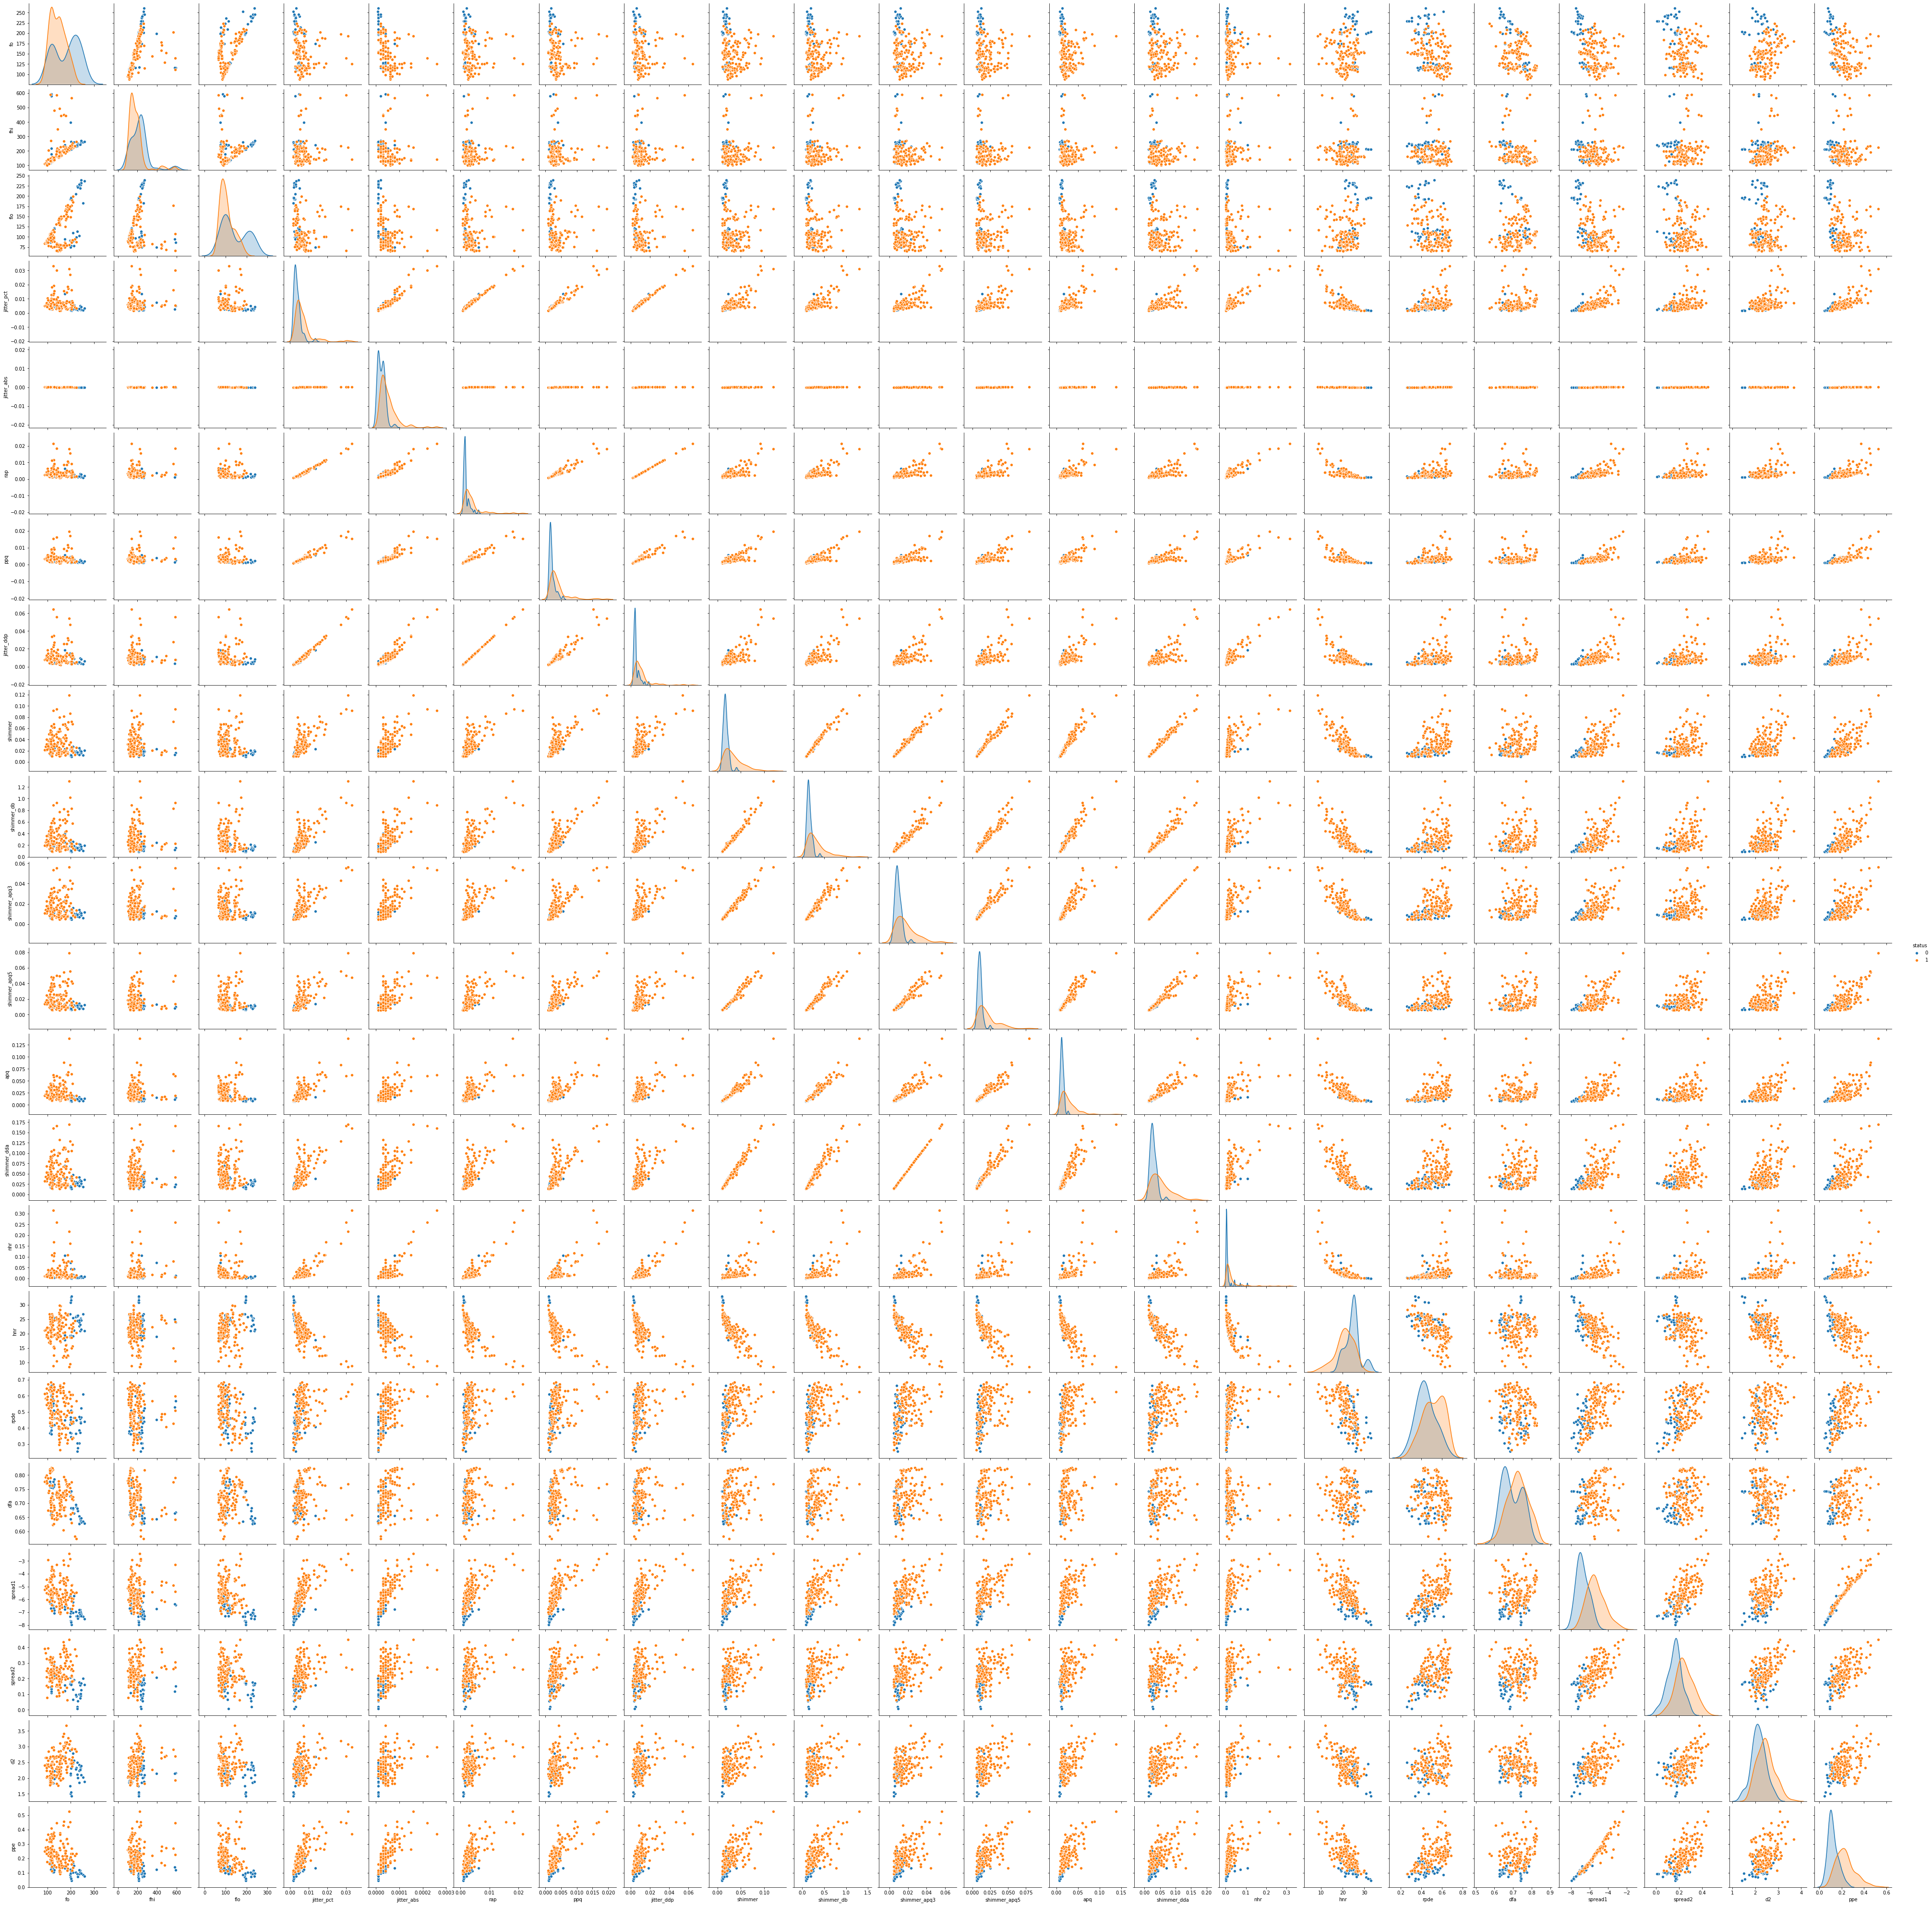

In [30]:
sns.pairplot(df, hue='status')

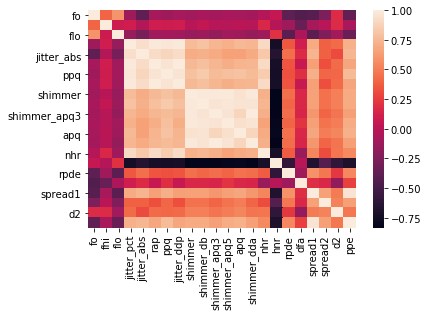

In [244]:
sns.heatmap(X_df.corr())

From the pairplot we see that, for most of the features in the feature space we could say there is a marked difference between the voice measurements of patients with PD w.r.t. those who are not suffering from it. 

Taking for example, average fundamental frequency(fo). We see, that there are two clusters in Class 0. But the mean of average fundamental frequency of Class 1 is higher than Class 0. Similar pattern follows in other measures of frequency. 

On the other hand, looking at measures of amplitude, one could draw from the pairplot is the mean measure of amplitude is higher for class 0 than class 1. This could mean that subjects belonging to class 1 are able speak at a lower volume than those from class 0. 

The tonal component nhr(noise to harmonics ratio) shows a high positive correlation with measures of frequency and amplitudes and the trend is reversed ( high negative correaltion) for the hnr (harmonics to noise ratio).


In [238]:
from scipy.stats import zscore

df_new = df.copy()
df_new.pop('name')
df_new.pop('status')
df_new = df_new.apply(zscore)


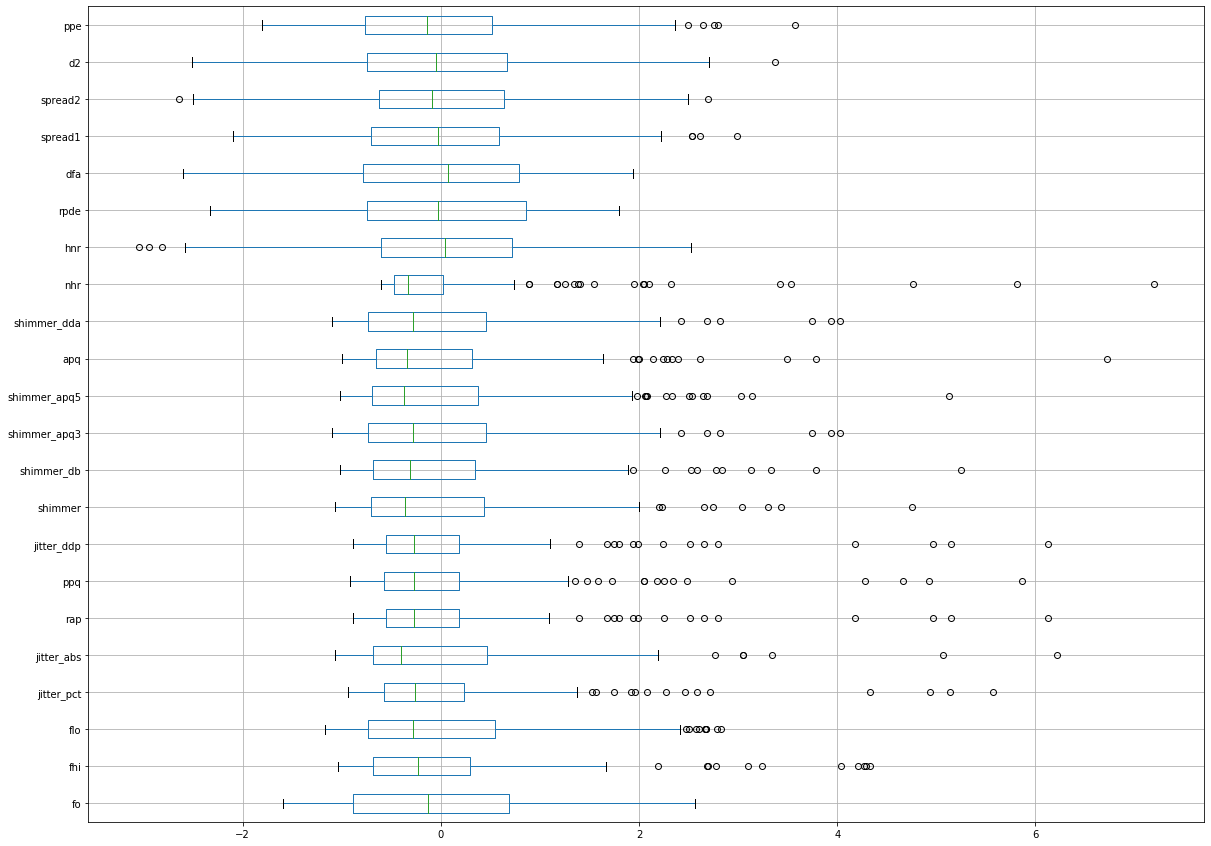

In [69]:
ax = df_new.boxplot(vert=False, figsize=(20,15))

### As of now, we are not doing anything to outliers in the data because there are two different clusters being formed of the two classes and we don't want to misrepresent it in our training set.

## Splitting the data into training and testing before moving further

In [98]:
from sklearn.model_selection import train_test_split

features = df.drop(['name','status'], axis=1)
target = df['status']
X = features.values
y = target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=target)

In [100]:
X_train

array([[2.580000e-03, 1.000000e-05, 1.340000e-03, ..., 6.341200e-02,
        2.361532e+00, 1.157300e-01],
       [7.090000e-03, 4.000000e-05, 3.910000e-03, ..., 3.755310e-01,
        3.671155e+00, 3.320860e-01],
       [3.100000e-03, 2.000000e-05, 1.590000e-03, ..., 2.797890e-01,
        2.241742e+00, 1.085140e-01],
       ...,
       [7.020000e-03, 7.000000e-05, 4.280000e-03, ..., 2.104580e-01,
        2.232576e+00, 2.606330e-01],
       [4.940000e-03, 4.000000e-05, 2.440000e-03, ..., 3.220440e-01,
        2.631793e+00, 2.283190e-01],
       [5.400000e-03, 6.000000e-05, 2.810000e-03, ..., 3.635660e-01,
        2.642476e+00, 2.759310e-01]])

### Decsion tree using the entropy criterion

In [104]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [105]:
dt_model.score(X_train , y_train)

1.0

In [106]:
dt_model.score(X_test , y_test)

0.8983050847457628

In [ ]:
# Since this tree is not regularized it is an overfit tree

In [222]:
from sklearn import metrics

predictions = dt_model.predict(X_test)

#Assess the accuracy of the model on test data
print(metrics.confusion_matrix(y_test,predictions))

[[36  9]
 [ 1 43]]


In [223]:
# make predictions
expected = y_test
predicted = dt_model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88        45
           1       0.83      0.98      0.90        44

    accuracy                           0.89        89
   macro avg       0.90      0.89      0.89        89
weighted avg       0.90      0.89      0.89        89



In [230]:
len(expected)

89

In [231]:
len(predicted)

89

### Regularized Decision Tree

In [149]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [150]:
dt_model.score(X_train , y_train)

0.9338235294117647

In [151]:
dt_model.score(X_test , y_test)

0.8983050847457628

In [152]:
predictions = dt_model.predict(X_test)

#Assess the accuracy of the model on test data
print(metrics.confusion_matrix(y_test,predictions))

[[12  3]
 [ 3 41]]


In [153]:
# make predictions
expected = y_test
predicted = dt_model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.93      0.93      0.93        44

    accuracy                           0.90        59
   macro avg       0.87      0.87      0.87        59
weighted avg       0.90      0.90      0.90        59



#### Regulaization of the decision tree has increased the accuracy of the class 0 which had a very low recall. 

#### Recall for class 0 improved seven points over previous and precision and recall for class 0 are balanced which is also a good sign

#### An unregularized tree leads to overfitting which happened in the previous case. 

In [205]:
### Fitting a Random Forest

from sklearn.ensemble import RandomForestClassifier

rfcl = RandomForestClassifier(n_estimators = 10, max_depth=5, min_samples_leaf=10)
rfcl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [206]:
print(rfcl.score(X_train,y_train))
print(rfcl.score(X_test,y_test))

predictions = rfcl.predict(X_test)

#Assess the accuracy of the model on test data
print(metrics.confusion_matrix(y_test,predictions))

0.8823529411764706
0.864406779661017
[[ 8  7]
 [ 1 43]]


In [207]:
# make predictions
expected = y_test
predicted = rfcl.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.86      0.98      0.91        44

    accuracy                           0.86        59
   macro avg       0.87      0.76      0.79        59
weighted avg       0.87      0.86      0.85        59



### The random forest is also lacking in predicitng class 0 accurately because of the imbalance of classes. 

### Generating a new resampled dataset that has a balanced target class using imbalanced-learn API and then evaluate it's performance

In [215]:
from imblearn.over_sampling import SMOTE

In [216]:
sm = SMOTE(random_state=100)
X_res, y_res = sm.fit_resample(X, y)

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=100, stratify=y_res)

In [218]:
rfcl = RandomForestClassifier(n_estimators = 10, max_depth=5, min_samples_leaf=10)
rfcl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [219]:
print(rfcl.score(X_train,y_train))
print(rfcl.score(X_test,y_test))

predictions = rfcl.predict(X_test)

#Assess the accuracy of the model on test data
print(metrics.confusion_matrix(y_test,predictions))

0.8926829268292683
0.8764044943820225
[[39  6]
 [ 5 39]]


In [220]:
# make predictions
expected = y_test
predicted = rfcl.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        45
           1       0.87      0.89      0.88        44

    accuracy                           0.88        89
   macro avg       0.88      0.88      0.88        89
weighted avg       0.88      0.88      0.88        89



### As predicted, we are able to improve recall of class 0 greatly by over_sampling technique. 